# PytorchligthningDataloader + mnist 

In [ ]:
# !pip install torchvision
# !pip install lightning

In [10]:
import os
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import MNIST
from torchvision.transforms import Compose, ToTensor, Normalize
from lightning import LightningDataModule

class MNISTDataModule(LightningDataModule):
    def __init__(self, data_dir='./data', batch_size=32, num_workers=2, debug_local=False):
        super().__init__()
        self.data_dir = data_dir
        self.batch_size = batch_size
        self.num_workers = num_workers
        self.debug_local = debug_local

        self.train_dataset = None
        self.val_dataset = None
        self.test_dataset = None

        self.transform = Compose([
            ToTensor(),
            Normalize((0.1307,), (0.3081,))  # Стандартные параметры MNIST
        ])

    def prepare_data(self):
        """Проверяет наличие данных и скачивает, если их нет (только для локального дебага)"""
        
        if self.debug_local:
            print("📥 Локальный режим: скачиваем данные при необходимости")
            MNIST(root=self.data_dir, train=True, download=True)
            MNIST(root=self.data_dir, train=False, download=True)

    def setup(self, stage=None):
        if stage == 'fit' or stage is None:
            full_dataset = MNIST(root=self.data_dir, train=True, transform=self.transform, download=False)
            train_size = int(0.9 * len(full_dataset))
            val_size = len(full_dataset) - train_size
            self.train_dataset, self.val_dataset = random_split(full_dataset, [train_size, val_size])

        if stage == 'test' or stage is None:
            self.test_dataset = MNIST(root=self.data_dir, train=False, transform=self.transform, download=False)

    def train_dataloader(self):
        return DataLoader(self.train_dataset, batch_size=self.batch_size, num_workers=self.num_workers, shuffle=True)

    def val_dataloader(self):
        return DataLoader(self.val_dataset, batch_size=self.batch_size, num_workers=self.num_workers)

    def test_dataloader(self):
        return DataLoader(self.test_dataset, batch_size=self.batch_size, num_workers=self.num_workers)

📥 Локальный режим: скачиваем данные при необходимости


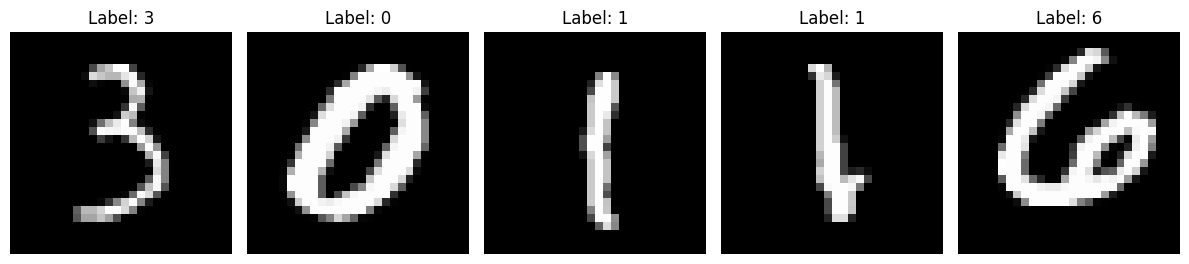

In [12]:
import matplotlib.pyplot as plt
import torchvision

# Инициализируем датамодуль
dm = MNISTDataModule(batch_size=64, debug_local=True)
dm.prepare_data()
dm.setup("fit")

# Получаем первый батч
batch = next(iter(dm.train_dataloader()))
images, labels = batch

# Рисуем 5 первых изображений
plt.figure(figsize=(12, 3))
for i in range(5):
    img = images[i].squeeze()  # MNIST — 1x28x28 → squeeze до 28x28
    label = labels[i].item()
    plt.subplot(1, 5, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"Label: {label}")
    plt.axis("off")
plt.tight_layout()
plt.show()